# Q3

# a

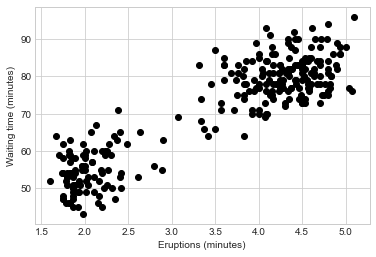

In [1]:
import numpy as np
data = np.loadtxt("GMM.txt")
data = data[:,1:]
x1 = data[:,0]
x2 = data[:,1]

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.xlabel('Eruptions (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.plot(x1, x2, 'o', color='black');

### Initial Guess (Eyeball)
$$\pi=0.5$$
$$\mu_{x_1}=55$$
$$\mu_{x_2}=80$$
$$\mu_{y_1}=2$$
$$\mu_{y_2}=4$$

### Expectation Step

In [2]:
p = 0.5
mx1 = 2
mx2 = 4
my1 = 55
my2 = 80
sx1 = 2
sx2 = 5
sy1 = 1
sy2 = 3


In [94]:
from math import sqrt, pi, exp
def phi(x,mean,var):
    density = 1/sqrt(var*2*pi)*exp(-(x-mean)**2/(2*var))
    return density

In [95]:
def bimodalGMM(max_iter,data,init_mx1,init_mx2,init_s1,init_s2,init_p):
    n = np.shape(data)[0]
    gamma = np.zeros([n])
    mx1 = init_mx1
    mx2 = init_mx2
    s1 = init_s1
    s2 = init_s2
    p   = init_p
    
    for j in range(max_iter):
        for i in range(n):
            #print(j,i)
            gamma[i] = p*phi(data[i],mx2,s2)/((1-p)*phi(data[i],mx1,s1)+p*phi(data[i],mx2,s2))

        mx1 = np.sum((1-gamma)*data)/np.sum(1-gamma)
        mx2 = np.sum(gamma*data)/np.sum(gamma)
        s1 = np.sum((1-gamma)*(data-mx1)**2)/np.sum(1-gamma)
        s2 = np.sum(gamma*(data-mx2)**2)/np.sum(gamma)
        p   = np.mean(gamma)
        
        #print('gamma',gamma)
        
        #print('guess',mx1,mx2,sx1,sx2,p)
        
        # stop condition?
    
    return mx1,mx2,s1,s2,p
    

In [96]:
bimodalGMM(max_iter=200,data=x1,init_mx1=2,init_mx2=4,init_s1=5,init_s2=5,init_p=0.5)

(2.018607817062885,
 4.2733434211918935,
 0.05551761918440799,
 0.19102419378622687,
 0.6515953659852476)

# b

### 2D Bimodal GMM (EM Algorithm) w/ Assumed Spherical Covariance

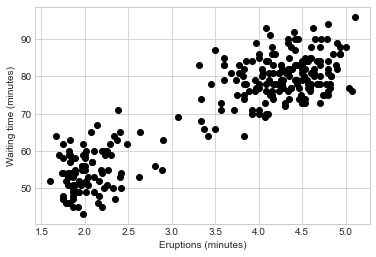

In [93]:
import numpy as np
data = np.loadtxt("GMM.txt")
data = data[:,1:] # remove first column (not real data)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.xlabel('Eruptions (minutes)')
plt.ylabel('Waiting time (minutes)')

plt.plot(x1, x2, 'o', color='black'); # plot data

In [4]:
from math import sqrt, pi, exp
def phi(point,xmean,ymean,var):
    density = 1/sqrt(var*2*pi)*exp(-((point[0]-xmean)**2+(point[1]-ymean)**2)/(2*var))
    return density

In [42]:
def bimodalGMM(max_iter,data,init_mx1,init_mx2,init_my1,init_my2,init_s1,init_s2,init_p):
    n = np.shape(data)[0]
    gamma = np.zeros([n])
    mx1 = init_mx1  # initial guess for x-mean of distribution 1
    mx2 = init_mx2  # initial guess for x-mean of distribution 2
    my1 = init_my1  # initial guess for y-mean of distribution 1
    my2 = init_my2  # initial guess for y-mean of distribution 2
    s1  = init_s1   # initial guess for variance of distribution 1
    s2  = init_s2   # initial guess for variance of distribution 2
    p   = init_p    # calculate weight
    
    track1 = np.array([[mx1,my1]])  # track values of group 1
    track2 = np.array([[mx2,my2]])  # track values of group 2
    
    for j in range(max_iter):
        for i in range(n):
            
            # calculate individual responsibilities
            gamma[i] = p*phi(data[i,:],mx2,my2,s2)/((1-p)*phi(data[i,:],mx1,my1,s1)+p*phi(data[i,:],mx2,my2,s2))

        # save old values
        mx1_old = mx1    
        mx2_old = mx2  
        my1_old = my1  
        my2_old = my2  
            
        # update guesses
        mx1 = np.sum((1-gamma)*data[:,0])/np.sum(1-gamma)
        mx2 = np.sum(gamma*data[:,0])/np.sum(gamma)
        my1 = np.sum((1-gamma)*data[:,1])/np.sum(1-gamma)
        my2 = np.sum(gamma*data[:,1])/np.sum(gamma)
        s1 = np.sum((1-gamma)*np.sqrt((data[:,0]-mx1)**2+(data[:,1]-my1)**2))/np.sum(1-gamma)
        s2 = np.sum(gamma*np.sqrt((data[:,0]-mx2)**2+(data[:,1]-my2)**2))/np.sum(gamma)
        p   = np.mean(gamma)
        
        # track new values
        track1 = np.append((track1),np.array([[mx1,my1]]),axis=0)
        track2 = np.append((track2),np.array([[mx2,my2]]),axis=0)
        
        # arbitrary stop condition
        if ((mx1_old-mx1) < 0.00001) and ((mx2_old-mx2) < 0.00001) and ((my1_old-my1) < 0.00001) and ((my2_old-my2) < 0.00001):
            break
        
        nIter = j+1
        
    print('Number of Iterations:',j+1)
    
    return mx1,mx2,my1,my2,s1,s2,p, track1,track2,nIter

In [43]:

    
meanx1,meanx2,meany1,meany2,var1,var2,frac,track1,track2, j = bimodalGMM(max_iter=100,data=data,init_mx1=2,init_mx2=4,init_my1=80,init_my2=80,init_s1=5,init_s2=5,init_p=0.5)
print('mean x1:', meanx1)
print('mean x2:', meanx2)
print('mean y1:', meany1)
print('mean y2:', meany2)
print('var 1:', var1)
print('var 2:', var2)
print('fraction:', frac)
print('j:', j)

Number of Iterations: 10
mean x1: 2.096000538125212
mean x2: 4.29848628124071
mean y1: 54.76596462031759
mean y2: 80.2933036436564
var 1: 4.910407474614889
var 2: 4.551305863444221
fraction: 0.6319144423343023
j: 9


In [44]:
track1

array([[ 2.        , 80.        ],
       [ 3.2084977 , 67.89514305],
       [ 2.29961039, 56.6808238 ],
       [ 2.15196572, 55.28938907],
       [ 2.10626002, 54.87723995],
       [ 2.09774602, 54.78571769],
       [ 2.09624629, 54.76886013],
       [ 2.09603489, 54.76637377],
       [ 2.09600529, 54.76602131],
       [ 2.09600112, 54.76597162],
       [ 2.09600054, 54.76596462]])

In [45]:
track2

array([[ 4.        , 80.        ],
       [ 3.71907934, 73.38316051],
       [ 4.313583  , 80.77758013],
       [ 4.31386006, 80.54892957],
       [ 4.30330434, 80.35365285],
       [ 4.2993939 , 80.30410199],
       [ 4.29862591, 80.29489456],
       [ 4.29850626, 80.29352879],
       [ 4.29848905, 80.29333485],
       [ 4.29848662, 80.2933075 ],
       [ 4.29848628, 80.29330364]])

In [51]:
from matplotlib import cm
from numpy import linspace

start = 0.0
stop = 1.0
num_colors = 10
cm_subsection = linspace(start, stop, num_colors) 

colors = [ cm.Set1(x) for x in cm_subsection ]

for i in range(loc.shape[-1]):
    for t in range(loc.shape[0]):
        # Plot fading tail for past locations.
        plt.plot(loc[t, 0, i], loc[t, 1, i], 'o', markersize=3, 
                 color=colors[i], alpha=1-(float(t)/loc.shape[0]))
    # Plot final location.
    plt.plot(loc[0, 0, i], loc[0, 1, i], 'o', color=colors[I])

NameError: name 'loc' is not defined

Text(0, 0.5, 'Waiting time (minutes)')

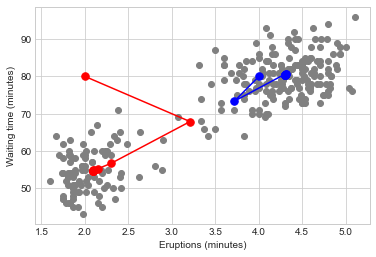

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.plot(x1, x2,'o', color='grey'); # plot data

#np_trajectories = np.array(trajectories_vect)
#plt.plot(np_trajectories.T)

#plt.gca().set_aspect("equal")

plt.plot(track1[:,0], track1[:,1], '.-',
         color='red',  markersize=15);

plt.plot(track2[:,0], track2[:,1],'.-',
          color='blue',  markersize=15);

plt.xlabel('Eruptions (minutes)')
plt.ylabel('Waiting time (minutes)')

In [31]:
np.random.seed(123)

mx1_group = np.random.random_sample([50])*(np.max(data[:,0])-np.min(data[:,0]))+np.min(data[:,0])
mx2_group = np.random.random_sample([50])*(np.max(data[:,0])-np.min(data[:,0]))+np.min(data[:,0])
my1_group = np.random.random_sample([50])*(np.max(data[:,1])-np.min(data[:,1]))+np.min(data[:,1])
my2_group = np.random.random_sample([50])*(np.max(data[:,1])-np.min(data[:,1]))+np.min(data[:,1])
sy1_group = np.random.random_sample([50])*5+1
sy2_group = np.random.random_sample([50])*5+1
p_group = np.random.random_sample([50])

iterationCount = np.zeros([50])

for i in range(50):
    #callHere = bimodalGMM(max_iter=100,data=data,init_mx1=mx1_group[i], init_mx2=mx2_group[i],....)
    mx1,mx2,my1,my2,s1,s2,p,track1,track2,iterationCount[i] = bimodalGMM(max_iter=1000,data=data,init_mx1=mx1_group[i],init_mx2=mx2_group[i],init_my1=my1_group[i],init_my2=my2_group[i],init_s1=sy1_group[i],init_s2=sy2_group[i],init_p=p_group[i])

# plot histogram of "iterationCount"

Number of Iterations: 2
Number of Iterations: 2
Number of Iterations: 2
Number of Iterations: 2
Number of Iterations: 9
Number of Iterations: 2
Number of Iterations: 14
Number of Iterations: 13
Number of Iterations: 12
Number of Iterations: 4
Number of Iterations: 2
Number of Iterations: 11
Number of Iterations: 2
Number of Iterations: 2
Number of Iterations: 4
Number of Iterations: 13
Number of Iterations: 2
Number of Iterations: 13
Number of Iterations: 2
Number of Iterations: 15
Number of Iterations: 14
Number of Iterations: 2
Number of Iterations: 11
Number of Iterations: 13
Number of Iterations: 16
Number of Iterations: 10
Number of Iterations: 2
Number of Iterations: 2
Number of Iterations: 11
Number of Iterations: 2
Number of Iterations: 12
Number of Iterations: 2
Number of Iterations: 2
Number of Iterations: 15
Number of Iterations: 11
Number of Iterations: 2
Number of Iterations: 3
Number of Iterations: 2
Number of Iterations: 12
Number of Iterations: 7
Number of Iterations: 2

In [64]:
iterationCount

array([ 1.,  1.,  1.,  1.,  8.,  1., 13., 12., 11.,  3.,  1., 10.,  1.,
        1.,  3., 12.,  1., 12.,  1., 14., 13.,  1., 10., 12., 15.,  9.,
        1.,  1., 10.,  1., 11.,  1.,  1., 14., 10.,  1.,  2.,  1., 11.,
        6.,  1.,  6.,  9., 12.,  2., 11.,  1.,  1.,  2.,  1.])

Text(0, 0.5, 'Number of Iterations')

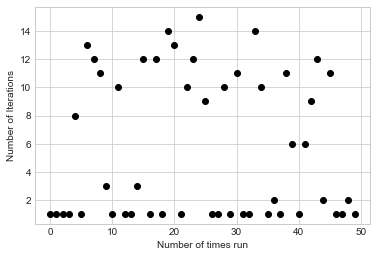

In [95]:
plt.plot(iterationCount, 'o', color='black'); # plot data
plt.xlabel('Number of times run')
plt.ylabel('Number of Iterations')

Text(0, 0.5, 'Frequency')

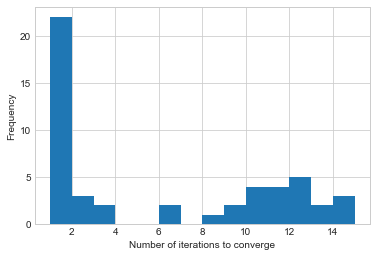

In [100]:
plt.hist(iterationCount, bins=np.arange(iterationCount.min(), iterationCount.max()+1))
plt.xlabel("Number of iterations to converge")
plt.ylabel("Frequency")

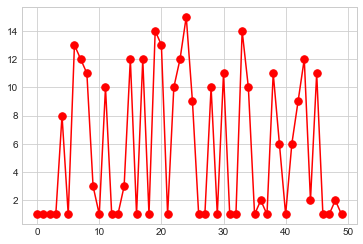

In [73]:
# plot number of iterations as x
# plot count as y

plt.plot(iterationCount,
          '.-', color='red', markersize=15);

# c

In [9]:
# defining the class K_Means with k value to be specified, tolerance and max iterations
class K_Means:
    def __init__(self, k, tolerance = 0.00001, max_iterations = 20000):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
        for i in range(self.k):
            self.centroids[i] = data[i]

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            self.label = {}
            self.loss = {}
            for i in range(self.k):
                self.classes[i] = []            
            
            # find the distance between the point and cluster; choose the nearest centroid
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)   

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True
            
            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
                    
            #self.loss = loss
            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                i=0
                for features in data:
                    distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                    self.loss[i] = min(distances)
                    self.label[i] = distances.index(min(distances))
                    i=i+1
                break

    def pred(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    

Text(0, 0.5, 'Objective function value')

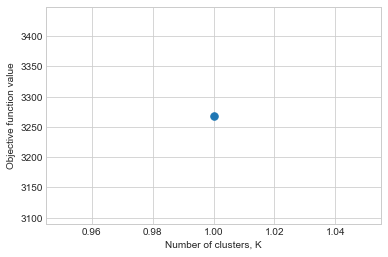

In [10]:
# choosing K=10 because the step loss is very high, creating an elbow at that value

Ks = 2

km = K_Means(k = Ks)
km.fit(data)
    

In [11]:
#counting number of elements under each cluster  for 10 clusters

labelVector = []
cluster_centroid = np.zeros((len(km.centroids.keys()),len(km.centroids[0])))
for i in range(len(km.label)):
        labelVector.append(km.label[i])
        

for i in range(0,Ks):
    print(labelVector.count(i))
    #cluster_centroid[i,:] = km.centroids[i]
    #print(cluster_centroid[i,:])
    



172
100


In [12]:
##report the words associated with the top components in (mi − x)

for i in range(0,Ks):
    idx_cluster = np.where(np.asarray(labelVector)==i)
    xmean = np.mean(data[idx_cluster,0])
    ymean = np.mean(data[idx_cluster,1])
    
    ("x and y Mean of cluster ", i , "is :") 
    print(xmean)
    print(ymean)

4.29793023255814
80.28488372093024
2.0943300000000002
54.75


(272, 2)
